<a href="https://colab.research.google.com/github/HabibaAbderrahim/Angular_Hope_Solution_Front/blob/main/Vis_irrgation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Introduction**

In this data analysis report,I focus on feature visualization and selection.

Feature selection with correlation, univariate feature selection, recursive feature elimination, recursive feature elimination with cross validation and tree based feature selection methods are used with random forest classification.

 ❌
**Note :** This Report Focuses **ONLY** on the **VIs** attributes and their relation with our target classes ( Frequencies (Red , Green , Blue) and Time series analysis(if necessary) will be driven on other reports.

#**Import the required libraries**

In [ ]:
from google.colab import files
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px



**Upload file from local**

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn , length=len(uploaded[fn])))

Saving cleaned_data.csv to cleaned_data.csv
User uploaded file "cleaned_data.csv" with length 136403 bytes


**Data Description**

In [ ]:
file_name = "cleaned_data.csv"
df= pd.read_csv(file_name)

In [ ]:
df.head()

,date,time,Plant Name,RED,GREEN,BLUE,NIR735,NIR850,NIR880,ARI,...,TCARI,VARI,VREI1,VREI2,ZM,Irrigation,Light,Parasites,Other,REPORT
0,2023-07-05,16:36:41,convallaria.majalis,8198.5082,11110.9012,4840.2522,34336.4840,110558.9275,67121.5197,6.7306,...,20050.7594,-9.431243e+08,4.1881,1.0,4.1881,0.0,-1.0,-2.0,0.0,Lily of the valley exposed to the sun when pla...
1,2023-07-06,12:22:29,nephrolepis.cordifolia,4212.8849,5242.7554,2209.9770,20829.0834,120658.7934,66599.3812,17.2216,...,3612.0236,-3.719188e+08,4.9441,1.0,4.9441,0.0,0.0,1.0,-1.0,Risk of being too often in the sun but no sign...
2,2023-07-06,12:48:05,citrus.limon,6904.0171,7080.8373,2882.6672,12451.9703,47787.3057,27082.3922,2.9111,...,10831.4880,-8.943012e+07,1.8036,1.0,1.8036,0.0,1.0,-1.0,-2.0,"Great exposure, from midday to evening. Satisf..."
3,2023-07-06,13:28:40,ficus.carica,2021.2313,2445.8251,1250.6995,10590.2564,112585.1469,75825.8355,35.4005,...,103.3903,-9.598523e+07,5.2395,1.0,5.2395,1.0,0.0,-1.0,0.0,"Partial exposure, part of the plant often in t..."
4,2023-07-06,14:05:11,zea.mays,7946.5068,8111.0880,2848.5226,12192.3982,44376.0359,21590.5070,1.8314,...,8980.4792,-7.123912e+07,1.5343,1.0,1.5343,0.0,1.0,1.0,-1.0,Total exposure. Satisfactory irrigation. No pa...


In [ ]:
df.shape

(193, 69)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 69 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        193 non-null    object 
 1   time        193 non-null    object 
 2   Plant Name  193 non-null    object 
 3   RED         193 non-null    float64
 4   GREEN       193 non-null    float64
 5   BLUE        193 non-null    float64
 6   NIR735      193 non-null    float64
 7   NIR850      193 non-null    float64
 8   NIR880      193 non-null    float64
 9   ARI         193 non-null    float64
 10  NDVI        193 non-null    float64
 11  ARI1        193 non-null    float64
 12  ARI2        193 non-null    float64
 13  BGI1        193 non-null    float64
 14  BGI2        193 non-null    float64
 15  BRI1        193 non-null    float64
 16  BRI2        193 non-null    float64
 17  CRI500      193 non-null    float64
 18  CRI700      193 non-null    float64
 19  EVI         193 non-null    f

❎All data is filled **no missed values detected**

❎Data type is **correct** for all attributes

Before starting , let's drop unnecessary attributes that do not help in our classification task.

**Report :** May be used in the future but for now we will not use it

**Irrigation , Light , Parasites and Other :** each is our class label

**Date and Time:** As first step i will exclude data and time and focus on VIs only (in **another report** i will include data and time because they may present **seasonality**) and may present for example parasites life cycle !

**Frequency (R , G , B)**: Also will be Removed and **another report** will be focusing only on frequency as features now i will be focusing on VIs.

**Note :** This is not a feature selection yet **!**

In [ ]:
df.columns

Index(['date', 'time', 'Plant Name', 'RED', 'GREEN', 'BLUE', 'NIR735',
       'NIR850', 'NIR880', 'ARI', 'NDVI', 'ARI1', 'ARI2', 'BGI1', 'BGI2',
       'BRI1', 'BRI2', 'CRI500', 'CRI700', 'EVI', 'GLI', 'GM1', 'GM2', 'GRVI',
       'Greenness', 'HI', 'LAI', 'MCARI1', 'MSAVI', 'MSR', 'MTVI', 'NDGI',
       'NDI1', 'NDI2', 'NDVI1', 'NDWI', 'NGBDI', 'NGRDI', 'NLI', 'PRI',
       'PSNDc', 'PSRI', 'PSSRa', 'PSSRb', 'PSSRc', 'RARS', 'RDVI', 'RENDVI',
       'RI', 'RVI', 'SGI', 'SIPI', 'SR', 'SR2', 'SR3', 'SR4', 'SR5', 'SR6',
       'SR7', 'TCARI', 'VARI', 'VREI1', 'VREI2', 'ZM', 'Irrigation', 'Light',
       'Parasites', 'Other', 'REPORT'],
      dtype='object')

Our **Targets** are : [df.Irrigation , df.Light , df.Parasites , df.Other]

We will be targeting and analazing the features(Vis) relation with **each Target separetly!**

🟩Target : **Irrigation**

In [ ]:
# y includes our labels
y = df.Irrigation

In [ ]:
y.head()

0    0.0
1    0.0
2    0.0
3    1.0
4    0.0
Name: Irrigation, dtype: float64

In [ ]:
print(f"Unique lables in our class Irrigation are {y.unique()}")

Unique lables in our class Irrigation are [ 0.  1. -2. -1.]


Changing the data type of your labels to **categorical**

In [ ]:
y=y.astype(int)
y= y.astype("category")

In [ ]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: Irrigation, dtype: category
Categories (4, int64): [-2, -1, 0, 1]

In [ ]:
list_to_drop = ['NIR735','NIR850', 'NIR880','date', 'time','Plant Name','RED', 'GREEN', 'BLUE','Irrigation', 'Light',
       'Parasites', 'Other', 'REPORT']
#x includes our features
x = df.drop(list_to_drop,axis = 1 )
x.head()

,ARI,NDVI,ARI1,ARI2,BGI1,BGI2,BRI1,BRI2,CRI500,CRI700,...,SR3,SR4,SR5,SR6,SR7,TCARI,VARI,VREI1,VREI2,ZM
0,6.7306,0.8619,0.0001,6.7306,0.4356,0.4356,0.5904,0.1410,2.2955,3.0903,...,4.1881,4.1881,0.0000,0.0000,0.0003,20050.7594,-9.431243e+08,4.1881,1.0,4.1881
1,17.2216,0.9325,0.0001,17.2216,0.4215,0.4215,0.5246,0.1061,2.3723,3.9729,...,4.9441,4.9441,0.0000,0.0000,0.0011,3612.0236,-3.719188e+08,4.9441,1.0,4.9441
2,2.9111,0.7475,0.0001,2.9111,0.4071,0.4071,0.4175,0.2315,2.4563,1.7585,...,1.8036,1.8036,0.0001,0.0001,0.0005,10831.4880,-8.943012e+07,1.8036,1.0,1.8036
3,35.4005,0.9647,0.0003,35.4005,0.5114,0.5114,0.6188,0.1181,1.9556,4.3299,...,5.2395,5.2395,0.0001,0.0001,0.0043,103.3903,-9.598523e+07,5.2395,1.0,5.2395
4,1.8314,0.6962,0.0000,1.8314,0.3512,0.3512,0.3585,0.2336,2.8475,1.5032,...,1.5343,1.5343,0.0001,0.0001,0.0004,8980.4792,-7.123912e+07,1.5343,1.0,1.5343


**What Irrigation Looks like**

In [ ]:
# count each category
counts = y.value_counts().sort_index()
# Print the counts and their labels meaning
for label, count in counts.items():
    if label == 0:
        label_name = "Absence"
    elif label == 1:
        label_name = "Presence"
    elif label == -2:
        label_name = "Middle"
    elif label == -1:
        label_name = "Other"
    print(f'Number of {label_name}: {count}')

Number of Middle: 2
Number of Other: 19
Number of Absence: 148
Number of Presence: 24


imbalanced data !

Resampling: You can oversample the minority class (create more instances) or undersample the majority class (remove some instances) to balance the class distribution.

Using Different Algorithms: Some algorithms are more robust to imbalanced data, so you may explore different machine learning algorithms.

Weighted Loss: Some classifiers allow you to assign different weights to different classes in the loss function to give more importance to the minority classes.

In [ ]:
value_counts = y.value_counts().reset_index()
value_counts.columns = ['Category', 'Count']

# Create a bar plot using Plotly
fig = px.bar(value_counts, x='Category', y='Count', text='Count', title='Distribution of Irrigation Categories')
fig.update_traces(texttemplate='%{text}', textposition='outside')

# Customize the plot (if needed)
fig.update_layout(xaxis_title='Lables', yaxis_title='Count')

# Show the plot
fig.show()

In [ ]:
import plotly.express as px

# Create a DataFrame with categories and their counts
data = {'Category': ["Absence", "Presence", "Middle", "Other"],
        'Count': [148, 24, 2, 19]}

# Create a bar plot using Plotly
fig = px.bar(data, x='Category', y='Count', text='Count', title='Distribution of Irrigation Categories')
fig.update_traces(texttemplate='%{text}', textposition='outside')

# Customize the plot (if needed)
fig.update_layout(xaxis_title='Categories', yaxis_title='Count')

# Show the plot
fig.show()


In [ ]:
x.describe().T

,count,mean,std,min,25%,50%,75%,max
ARI,193.0,9.201181e-01,5.861543e+00,-3.456410e+01,-1.091200e+00,5.542000e-01,2.738100e+00,3.540050e+01
NDVI,193.0,6.680378e-01,1.745320e-01,-1.033000e-01,5.646000e-01,6.871000e-01,7.954000e-01,9.647000e-01
ARI1,193.0,-3.108808e-06,1.181043e-04,-1.100000e-03,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e-04
ARI2,193.0,9.201181e-01,5.861543e+00,-3.456410e+01,-1.091200e+00,5.542000e-01,2.738100e+00,3.540050e+01
BGI1,193.0,5.379788e-01,7.044286e-02,3.410000e-01,4.958000e-01,5.427000e-01,5.754000e-01,8.217000e-01
BGI2,193.0,5.379788e-01,7.044286e-02,3.410000e-01,4.958000e-01,5.427000e-01,5.754000e-01,8.217000e-01
BRI1,193.0,6.046161e-01,1.216375e-01,3.585000e-01,5.089000e-01,5.951000e-01,6.888000e-01,1.099500e+00
BRI2,193.0,6.002907e-01,5.899894e-01,4.920000e-02,2.933000e-01,4.713000e-01,6.627000e-01,5.833500e+00
CRI500,193.0,1.891794e+00,2.535988e-01,1.217000e+00,1.737900e+00,1.842700e+00,2.018500e+00,2.932400e+00
CRI700,193.0,1.392026e+00,9.713884e-01,8.070000e-02,7.831000e-01,1.157900e+00,1.766400e+00,8.567500e+00


In [ ]:
x.shape

(193, 55)

**Visualization and Feature engineering of numeric attributes**

plot the distribution of these variables using boxplot or histogram

In [ ]:
from scipy.stats import skew

In [ ]:
# List of columns to drop
columns_to_drop = ["SR6", "VREI2", "ARI1", "NDI1"]

# Drop the specified columns from the DataFrame
x= x.drop(columns=columns_to_drop)

In [ ]:
for c in x.columns:
    skewness = skew(x[c])
    print(f"Skewness for {c} is: {skewness}")

Skewness for ARI is: 0.20178523741909
Skewness for NDVI is: -1.0658981308945024
Skewness for ARI2 is: 0.20178523741909
Skewness for BGI1 is: 0.5251071047316858
Skewness for BGI2 is: 0.5251071047316858
Skewness for BRI1 is: 0.6646773820411189
Skewness for BRI2 is: 4.982765179048673
Skewness for CRI500 is: 0.7990116694638061
Skewness for CRI700 is: 2.9216796421213336
Skewness for EVI is: 2.6693178047865853
Skewness for GLI is: -0.39356007065676535
Skewness for GM1 is: 2.9216796421213336
Skewness for GM2 is: 2.8492254902071474
Skewness for GRVI is: 3.4456001506424734
Skewness for Greenness is: 0.3760342845641596
Skewness for HI is: -1.2774545737139822
Skewness for LAI is: 2.726636562974676
Skewness for MCARI1 is: -5.019834117620807
Skewness for MSAVI is: -2.661318816519701
Skewness for MSR is: 1.5682707343252835
Skewness for MTVI is: 0.9833822887788986
Skewness for NDGI is: 0.32126441399192873
Skewness for NDI2 is: 6.154850672741594
Skewness for NDVI1 is: -1.0658981308945024
Skewness for 

In [ ]:
# Initialize lists
non_skewed_vars = []
skewed_vars = []

for c in x.columns:
    skewness = skew(x[c])
    if abs(skewness) <= 0.53:
        non_skewed_vars.append(c)
    else:
        skewed_vars.append(c)

print("Non-Skewed Variables:", non_skewed_vars)
print("Skewed Variables:", skewed_vars)

Non-Skewed Variables: ['ARI', 'ARI2', 'BGI1', 'BGI2', 'GLI', 'Greenness', 'NDGI', 'NGRDI', 'PRI', 'RDVI', 'RENDVI', 'RI']
Skewed Variables: ['NDVI', 'BRI1', 'BRI2', 'CRI500', 'CRI700', 'EVI', 'GM1', 'GM2', 'GRVI', 'HI', 'LAI', 'MCARI1', 'MSAVI', 'MSR', 'MTVI', 'NDI2', 'NDVI1', 'NDWI', 'NGBDI', 'NLI', 'PSNDc', 'PSRI', 'PSSRa', 'PSSRb', 'PSSRc', 'RARS', 'RVI', 'SGI', 'SIPI', 'SR', 'SR2', 'SR3', 'SR4', 'SR5', 'SR7', 'TCARI', 'VARI', 'VREI1', 'ZM']


Make Sure by Ploting Histograms and boxplots

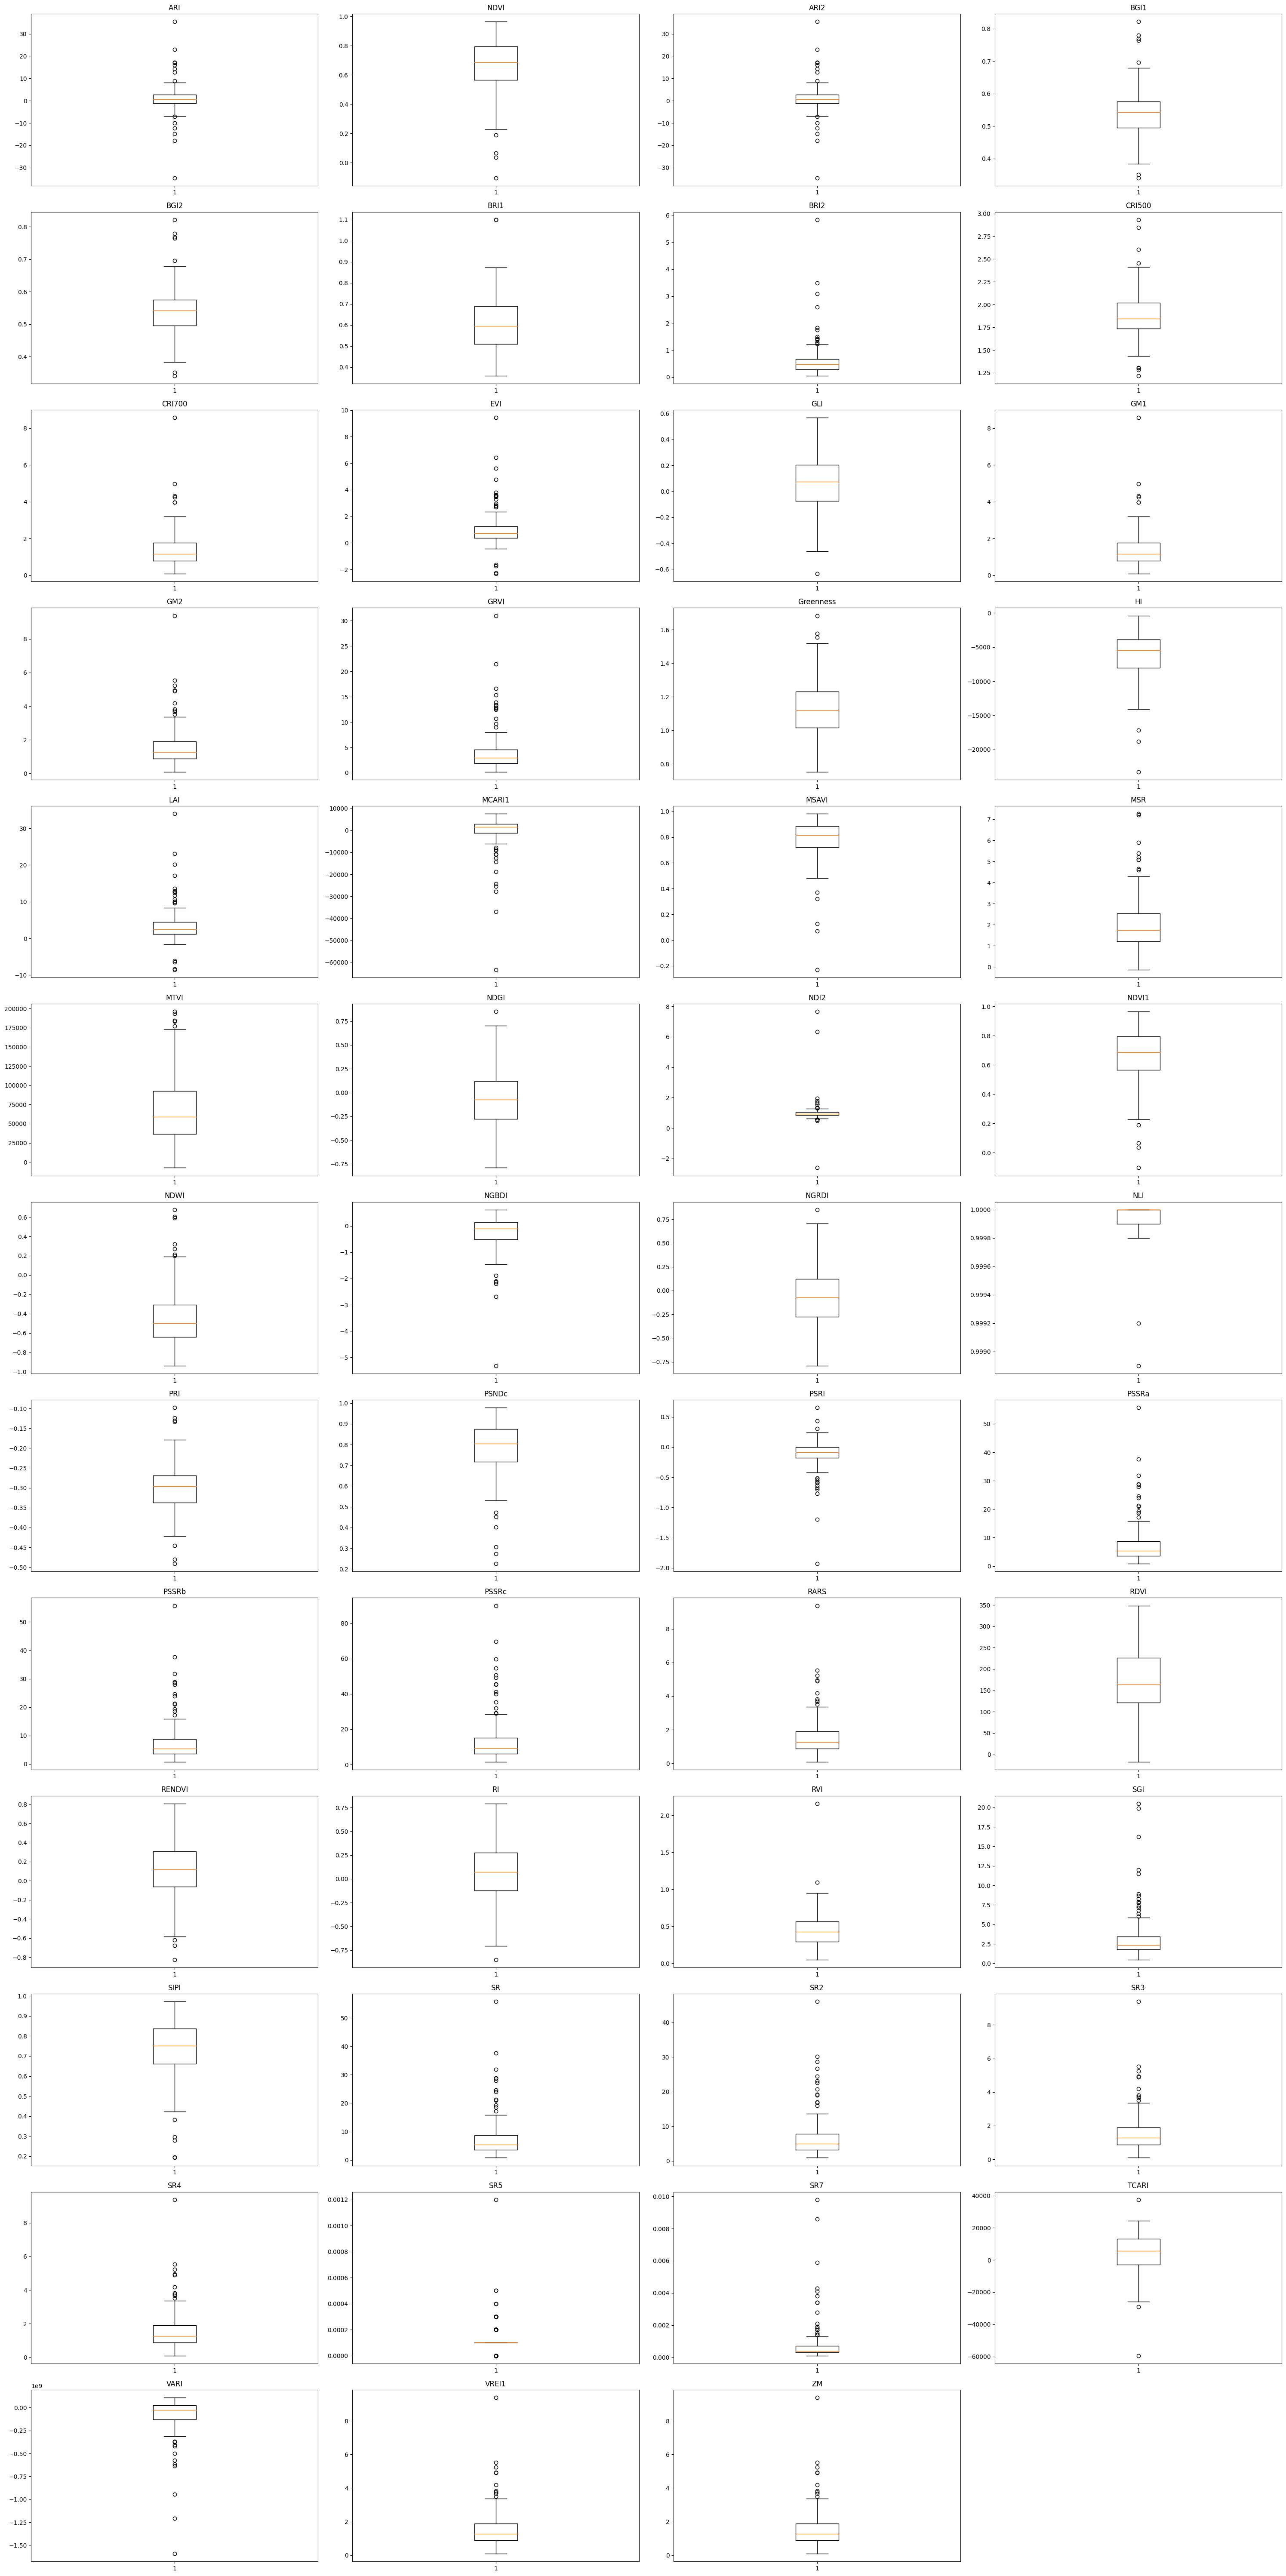

In [ ]:
columns_to_plot = x.columns

# Set the number of columns per row
columns_per_row = 4

# Calculate the number of rows needed
num_rows = (len(columns_to_plot) + columns_per_row - 1) // columns_per_row

# Create subplots with a grid layout
fig, axes = plt.subplots(num_rows, columns_per_row, figsize=(30, 60))

# Flatten the axes array to iterate through
axes = axes.ravel()

# Iterate through the columns and add box plots to the subplots
for i, column in enumerate(columns_to_plot):
    if i < len(columns_to_plot):
        ax = axes[i]
        ax.boxplot(df[column])
        ax.set_title(column)

# Remove any empty subplots if there are extra
for i in range(len(columns_to_plot), num_rows * columns_per_row):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


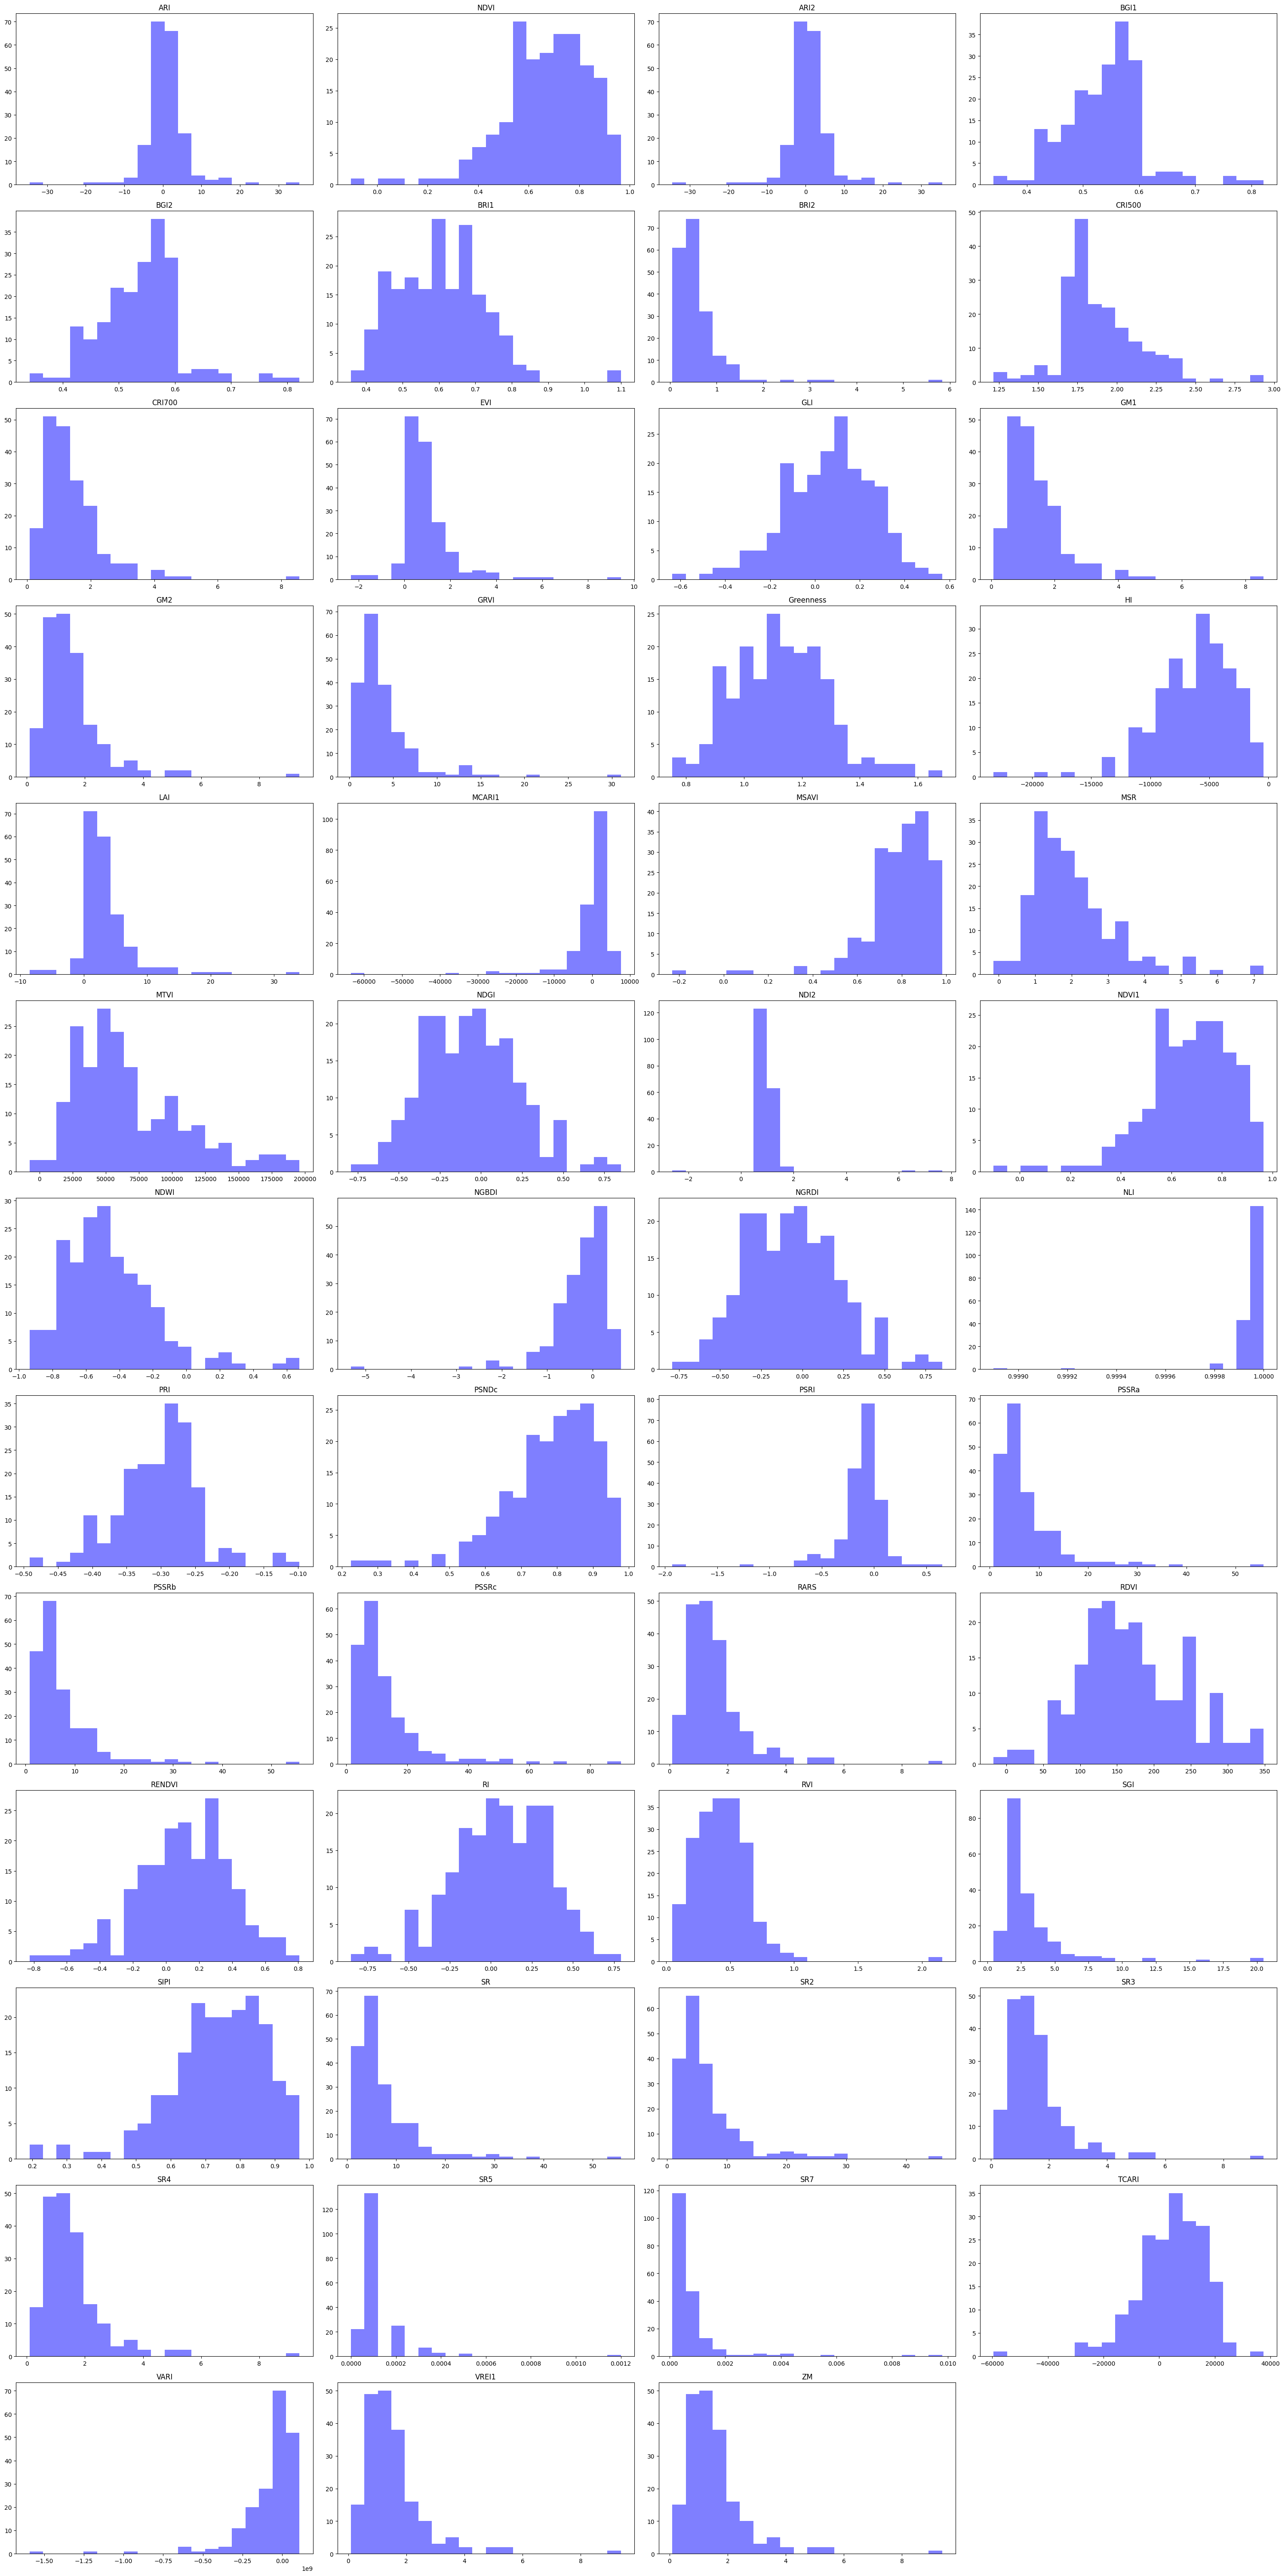

In [ ]:
columns_to_plot = x.columns

# Set the number of columns per row
columns_per_row = 4

# Calculate the number of rows needed
num_rows = (len(columns_to_plot) + columns_per_row - 1) // columns_per_row

# Create subplots with a grid layout
fig, axes = plt.subplots(num_rows, columns_per_row, figsize=(30, 60))

# Flatten the axes array to iterate through
axes = axes.ravel()

# Iterate through the columns and add histograms to the subplots
for i, column in enumerate(columns_to_plot):
    if i < len(columns_to_plot):
        ax = axes[i]
        ax.hist(df[column], bins=20, alpha=0.5, color='b')
        ax.set_title(column)

# Remove any empty subplots if there are extra
for i in range(len(columns_to_plot), num_rows * columns_per_row):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


**Data Normalization**

In [ ]:
x.head()

,ARI,NDVI,ARI2,BGI1,BGI2,BRI1,BRI2,CRI500,CRI700,EVI,...,SR,SR2,SR3,SR4,SR5,SR7,TCARI,VARI,VREI1,ZM
0,6.7306,0.8619,6.7306,0.4356,0.4356,0.5904,0.1410,2.2955,3.0903,0.3461,...,13.4852,9.9505,4.1881,4.1881,0.0000,0.0003,20050.7594,-9.431243e+08,4.1881,4.1881
1,17.2216,0.9325,17.2216,0.4215,0.4215,0.5246,0.1061,2.3723,3.9729,0.6539,...,28.6404,23.0144,4.9441,4.9441,0.0000,0.0011,3612.0236,-3.719188e+08,4.9441,4.9441
2,2.9111,0.7475,2.9111,0.4071,0.4071,0.4175,0.2315,2.4563,1.7585,0.4562,...,6.9217,6.7488,1.8036,1.8036,0.0001,0.0005,10831.4880,-8.943012e+07,1.8036,1.8036
3,35.4005,0.9647,35.4005,0.5114,0.5114,0.6188,0.1181,1.9556,4.3299,1.2546,...,55.7013,46.0316,5.2395,5.2395,0.0001,0.0043,103.3903,-9.598523e+07,5.2395,5.2395
4,1.8314,0.6962,1.8314,0.3512,0.3512,0.3585,0.2336,2.8475,1.5032,0.3202,...,5.5843,5.4710,1.5343,1.5343,0.0001,0.0004,8980.4792,-7.123912e+07,1.5343,1.5343


In [ ]:
# Skewed Variables
from sklearn.preprocessing import MinMaxScaler
# Create a new DataFrame for normalization
normalized_df = pd.DataFrame()


In [ ]:
from scipy.stats import boxcox

In [ ]:
df_new=pd.DataFrame()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

mmsc = MinMaxScaler()

for c in skewed_vars:
    x_new = c + '_log_scaled'
    if x[c].min() < 0:
        u1 = x[c] - x[c].min() + 1e-6
    else:
        u1 = x[c]
    u = np.log(u1)

    # Check for infinity or too large values
    if np.any(np.isinf(u)) or np.any(np.abs(u) > 1e308):
        print(f"Error in column '{c}'")
        problematic_values = u[np.isinf(u) | (np.abs(u) > 1e308)]
        print(problematic_values)
    else:
        u = mmsc.fit_transform(pd.DataFrame(u)).ravel()
        df_new[x_new] = pd.Series(u)


Error in column 'SR5'
0     -inf
1     -inf
22    -inf
26    -inf
31    -inf
39    -inf
44    -inf
69    -inf
93    -inf
94    -inf
122   -inf
124   -inf
128   -inf
132   -inf
140   -inf
148   -inf
150   -inf
160   -inf
162   -inf
166   -inf
171   -inf
178   -inf
Name: SR5, dtype: float64


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning:

divide by zero encountered in log



In [ ]:
skewed_scaler = MinMaxScaler()
for c in skewed_vars:
    # Apply the Box-Cox transformation (log transformation when lambda=0)
    u, _ = boxcox(x[c] - x[c].min() + 1e-6)
    c_new = c + '_log_scaled'
    normalized_df[c_new] = skewed_scaler.fit_transform(pd.DataFrame(u)).ravel()

In [ ]:
# Non-Skewed Variables
non_skewed_scaler = MinMaxScaler()
for c in non_skewed_vars:
    c_new = c + '_scaled'
    normalized_df[c_new] = non_skewed_scaler.fit_transform(pd.DataFrame(x[c])).ravel()

In [ ]:
normalized_df.head()

,NDVI_log_scaled,BRI1_log_scaled,BRI2_log_scaled,CRI500_log_scaled,CRI700_log_scaled,EVI_log_scaled,GM1_log_scaled,GM2_log_scaled,GRVI_log_scaled,HI_log_scaled,...,BGI1_scaled,BGI2_scaled,GLI_scaled,Greenness_scaled,NDGI_scaled,NGRDI_scaled,PRI_scaled,RDVI_scaled,RENDVI_scaled,RI_scaled
0,0.859873,0.504893,0.335055,0.728563,0.695688,0.414883,0.695688,0.755936,0.622535,0.182591,...,0.196796,0.196796,0.298995,0.647065,0.170565,0.170565,0.249809,0.859277,0.881867,0.829435
1,0.955361,0.414873,0.294369,0.763578,0.761257,0.442610,0.761257,0.801009,0.773529,0.476448,...,0.167464,0.167464,0.217247,0.528276,0.117690,0.117690,0.214740,0.948159,0.911875,0.882310
2,0.712369,0.225578,0.402795,0.801040,0.566840,0.424942,0.566840,0.560636,0.543189,0.684954,...,0.137508,0.137508,0.495306,0.293379,0.314327,0.314327,0.177891,0.525018,0.681058,0.685673
3,1.000000,0.540406,0.310053,0.562694,0.785010,0.493579,0.785010,0.817356,1.000000,0.733450,...,0.354483,0.354483,0.183351,0.491362,0.101243,0.101243,0.427192,0.940136,0.921673,0.898757
4,0.649256,0.000000,0.404030,0.965955,0.534946,0.412493,0.534946,0.528641,0.486298,0.691677,...,0.021219,0.021219,0.559774,0.288121,0.359405,0.359405,0.028463,0.482468,0.634638,0.640595


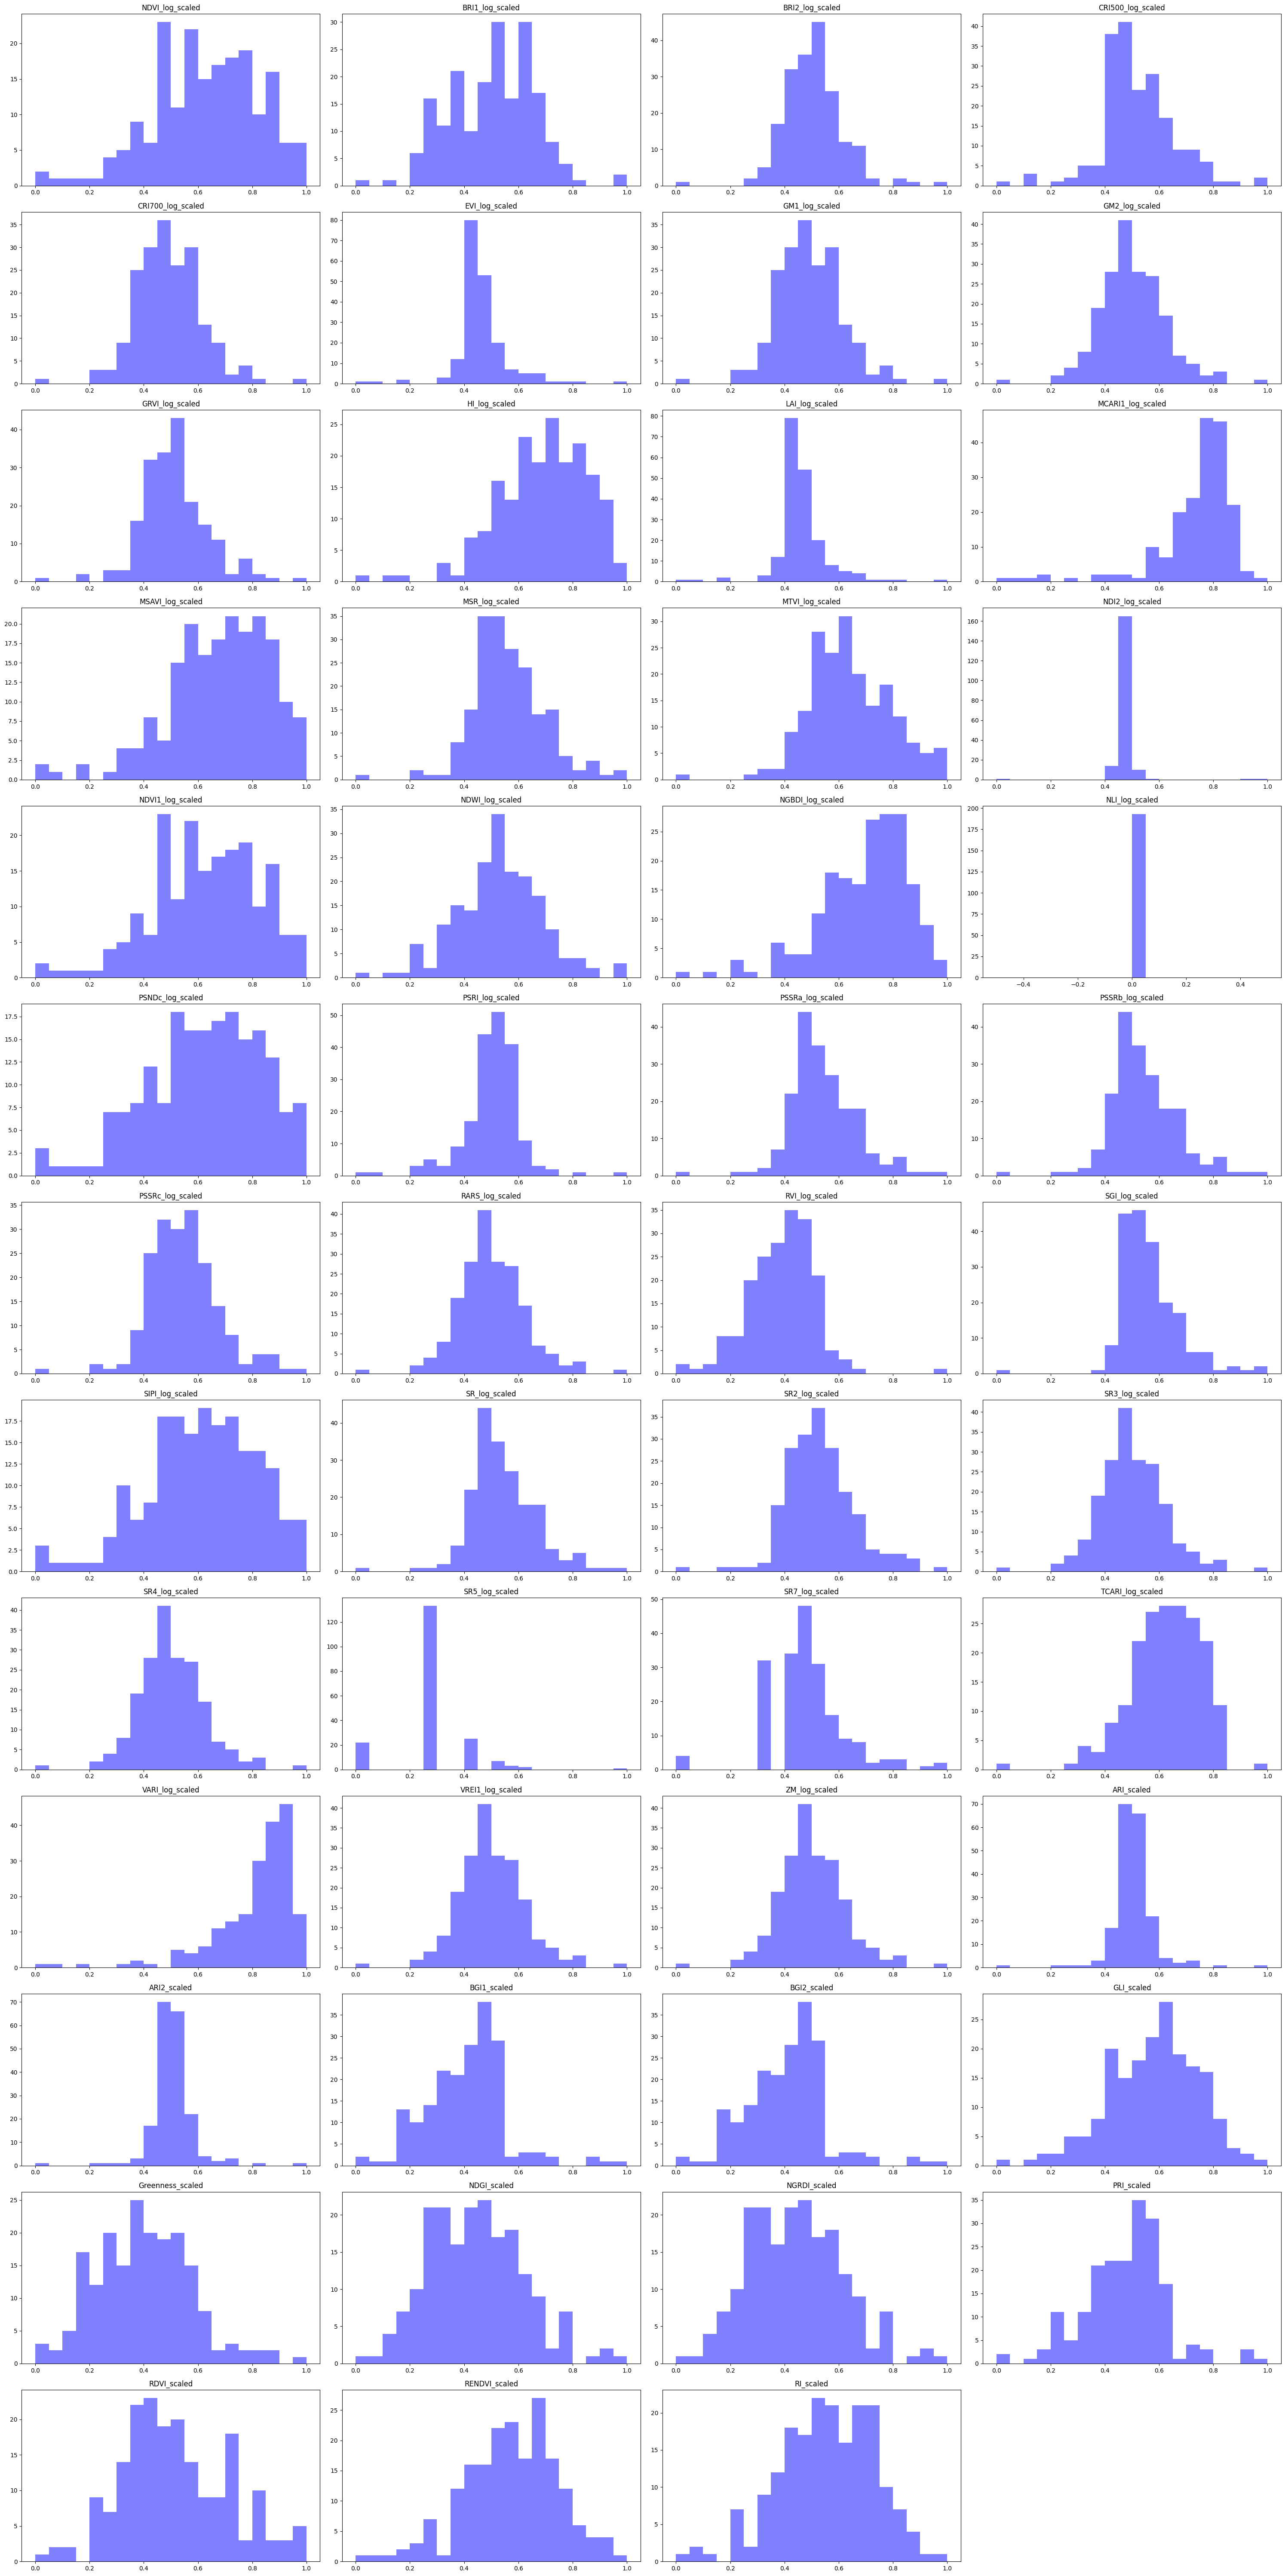

In [ ]:
columns_to_plot = normalized_df.columns

# Set the number of columns per row
columns_per_row = 4

# Calculate the number of rows needed
num_rows = (len(columns_to_plot) + columns_per_row - 1) // columns_per_row

# Create subplots with a grid layout
fig, axes = plt.subplots(num_rows, columns_per_row, figsize=(30, 60))

# Flatten the axes array to iterate through
axes = axes.ravel()

# Iterate through the columns and add histograms to the subplots
for i, column in enumerate(columns_to_plot):
    if i < len(columns_to_plot):
        ax = axes[i]
        ax.hist(normalized_df
         [column], bins=20, alpha=0.5, color='b')
        ax.set_title(column)

# Remove any empty subplots if there are extra
for i in range(len(columns_to_plot), num_rows * columns_per_row):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [ ]:
normalized_df.drop("NLI_log_scaled",axis=1,inplace=True)

In [ ]:
normalized_df.head()

,NDVI_log_scaled,BRI1_log_scaled,BRI2_log_scaled,CRI500_log_scaled,CRI700_log_scaled,EVI_log_scaled,GM1_log_scaled,GM2_log_scaled,GRVI_log_scaled,HI_log_scaled,...,BGI1_scaled,BGI2_scaled,GLI_scaled,Greenness_scaled,NDGI_scaled,NGRDI_scaled,PRI_scaled,RDVI_scaled,RENDVI_scaled,RI_scaled
0,0.859873,0.504893,0.335055,0.728563,0.695688,0.414883,0.695688,0.755936,0.622535,0.182591,...,0.196796,0.196796,0.298995,0.647065,0.170565,0.170565,0.249809,0.859277,0.881867,0.829435
1,0.955361,0.414873,0.294369,0.763578,0.761257,0.442610,0.761257,0.801009,0.773529,0.476448,...,0.167464,0.167464,0.217247,0.528276,0.117690,0.117690,0.214740,0.948159,0.911875,0.882310
2,0.712369,0.225578,0.402795,0.801040,0.566840,0.424942,0.566840,0.560636,0.543189,0.684954,...,0.137508,0.137508,0.495306,0.293379,0.314327,0.314327,0.177891,0.525018,0.681058,0.685673
3,1.000000,0.540406,0.310053,0.562694,0.785010,0.493579,0.785010,0.817356,1.000000,0.733450,...,0.354483,0.354483,0.183351,0.491362,0.101243,0.101243,0.427192,0.940136,0.921673,0.898757
4,0.649256,0.000000,0.404030,0.965955,0.534946,0.412493,0.534946,0.528641,0.486298,0.691677,...,0.021219,0.021219,0.559774,0.288121,0.359405,0.359405,0.028463,0.482468,0.634638,0.640595


**Bivariate Analysis**

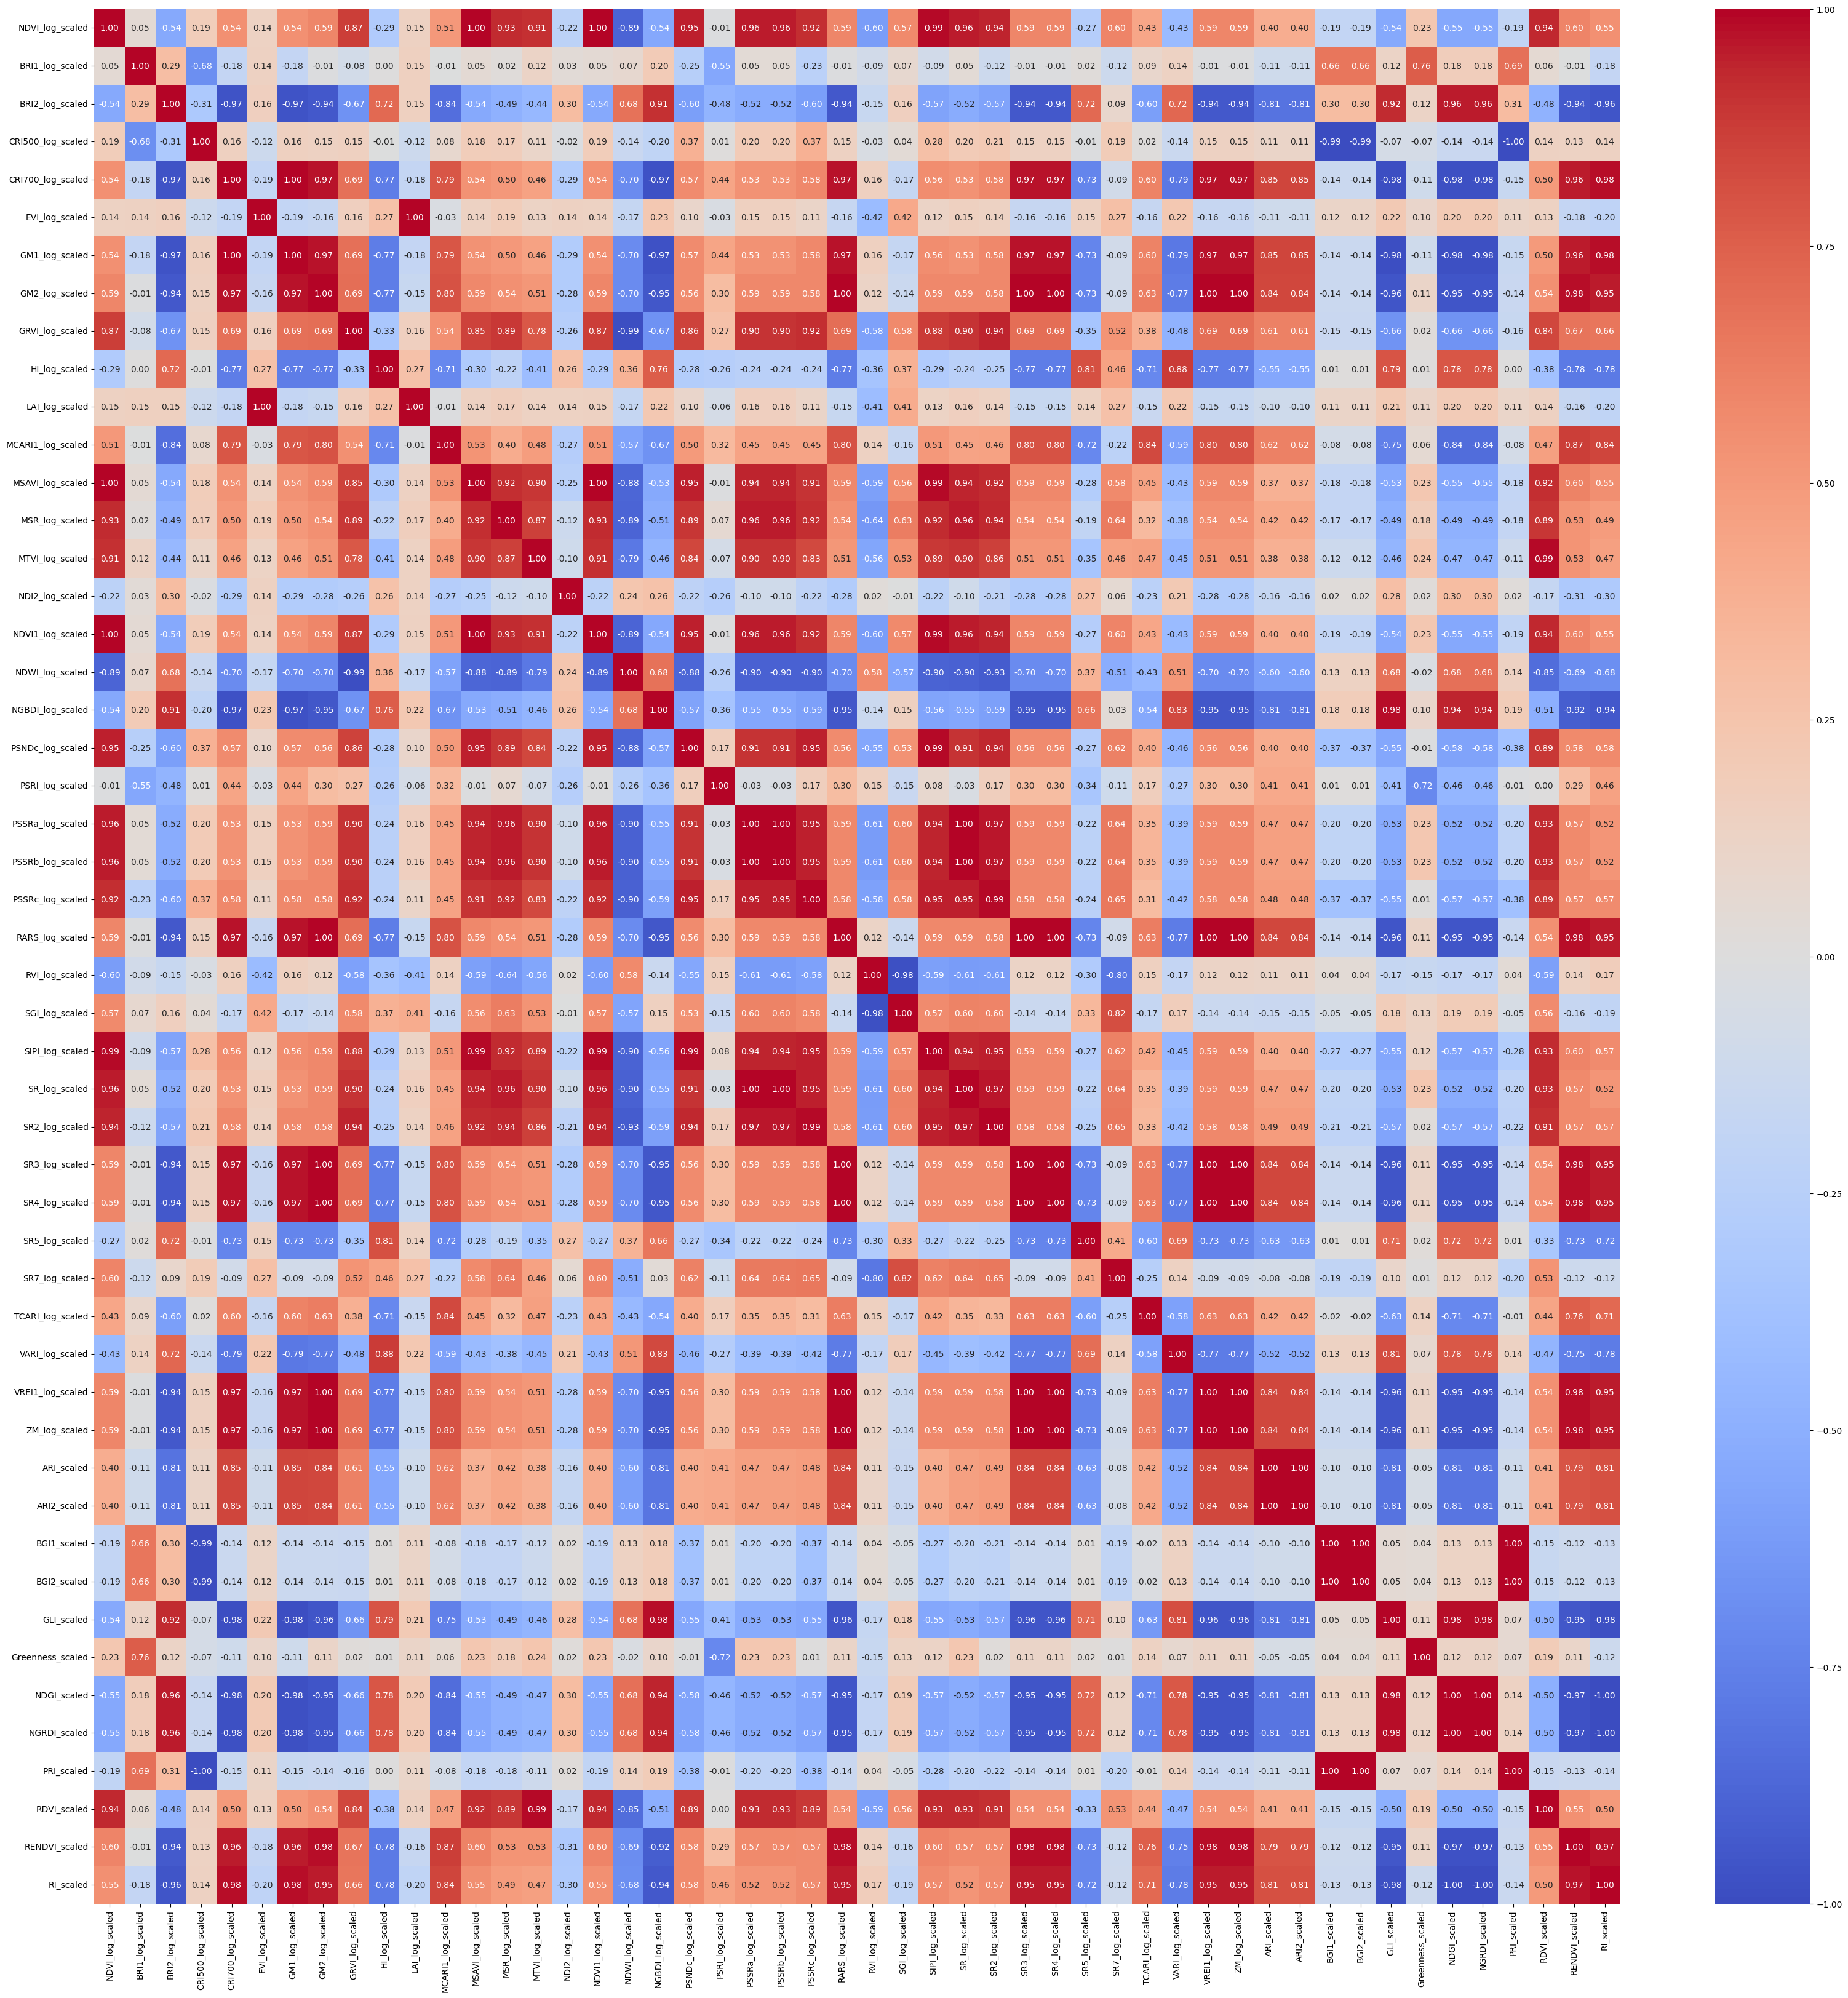

In [ ]:
# Calculate the correlation matrix
correlation_matrix = normalized_df.corr()

# Create a heatmap
plt.figure(figsize=(40, 40))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import seaborn as sns


In [ ]:
# ax =sns.pairplot(normalized_df)
# fig = ax
# fig.savefig('/content/drive/MyDrive/EcoBubble/bi.png')

Model Built using all features + Non normalized data (to see )

In [ ]:
y.unique()

[0, 1, -2, -1]
Categories (4, int64): [-2, -1, 0, 1]

Accuracy is: 0.8275862068965517


<Axes: >

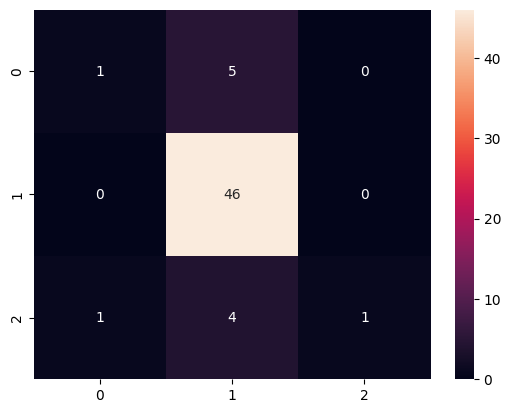

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Train a random forest classifier
clf_rf = RandomForestClassifier()
clf_rf.fit(x_train, y_train)

# Evaluate the model's accuracy
y_pred = clf_rf.predict(x_test)
ac = accuracy_score(y_test, y_pred)
print('Accuracy is:', ac)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt="d")


In [ ]:
y_test.unique()

[0, -1, 1]
Categories (4, int64): [-2, -1, 0, 1]

In [ ]:
# summarize
print('Train', x_train.shape, y_train.shape)
print('Test', x_test.shape, y_test.shape)

Train (135, 51) (135,)
Test (58, 51) (58,)


In [ ]:
# Select a specific row from the training data (change the index to the row you want to examine)
row_index = 90
sample_row = x_train.iloc[[row_index]]

# Get the true label for the selected row
true_label = y_train.iloc[row_index]

# Predict the label for the selected row
predicted_label = clf_rf.predict(sample_row)

print(f"True Label: {true_label}")
print(f"Predicted Label: {predicted_label[0]}")


True Label: 0
Predicted Label: 0


In [ ]:
# Check data distribution
unique_categories = y.unique()
print("Unique Categories:", unique_categories)

# Ensure stratified split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)


Unique Categories: [0, 1, -2, -1]
Categories (4, int64): [-2, -1, 0, 1]


Accuracy is: 0.7413793103448276


<Axes: >

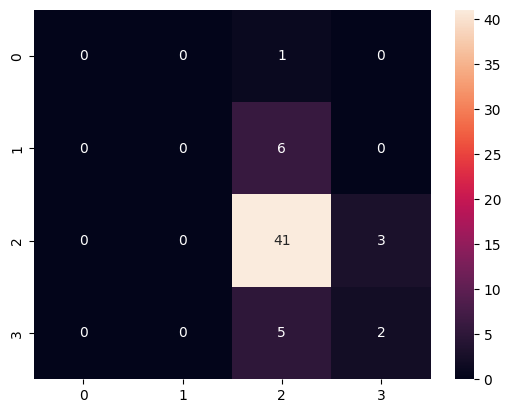

In [ ]:
# Train a random forest classifier
clf_rf = RandomForestClassifier()
clf_rf.fit(x_train, y_train)

# Evaluate the model's accuracy
y_pred = clf_rf.predict(x_test)
ac = accuracy_score(y_test, y_pred)
print('Accuracy is:', ac)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt="d")

order :  [-2, -1, 0, 1].

Univariate feature selection and random forest classification

In [ ]:
#Normalized
x_train, x_test, y_train, y_test = train_test_split(normalized_df, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
select_feature = SelectKBest(chi2, k=10).fit(x_train, y_train)

In [ ]:
print('Score list:', select_feature.scores_)
print('Feature list:', x_train.columns)

Score list: [0.32970981 0.22314149 0.07464988 0.29430276 0.08444803 0.02825026
 0.08444803 0.06190582 0.33757291 0.00593971 0.02087525 0.0295186
 0.22470662 0.2399635  0.36958833 0.03274173 0.32970981 0.47884243
 0.11351306 0.62042045 0.10781598 0.25820524 0.25820524 0.36500005
 0.06190582 0.2227852  0.14740299 0.48571227 0.25820524 0.30225748
 0.06190582 0.06190582 0.00878513 0.28424242 0.04675257 0.04268901
 0.06190582 0.06190582 0.04397329 0.04397329 0.44675931 0.44675931
 0.12723311 0.19042861 0.21782716 0.21782716 0.39352151 0.86283912
 0.11671134 0.17204479]
Feature list: Index(['NDVI_log_scaled', 'BRI1_log_scaled', 'BRI2_log_scaled',
       'CRI500_log_scaled', 'CRI700_log_scaled', 'EVI_log_scaled',
       'GM1_log_scaled', 'GM2_log_scaled', 'GRVI_log_scaled', 'HI_log_scaled',
       'LAI_log_scaled', 'MCARI1_log_scaled', 'MSAVI_log_scaled',
       'MSR_log_scaled', 'MTVI_log_scaled', 'NDI2_log_scaled',
       'NDVI1_log_scaled', 'NDWI_log_scaled', 'NGBDI_log_scaled',
       'PS

Accuracy is:  0.7586206896551724


<Axes: >

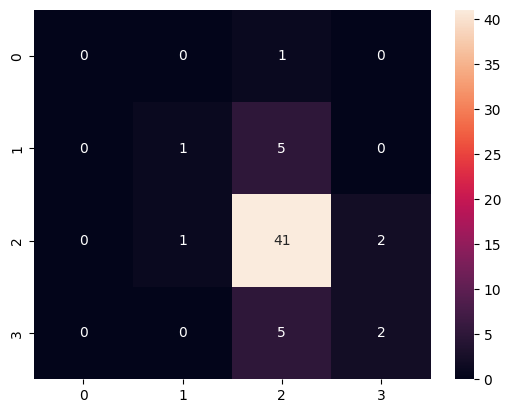

In [ ]:
x_train_2 = select_feature.transform(x_train)
x_test_2 = select_feature.transform(x_test)
#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier()
clr_rf_2 = clf_rf_2.fit(x_train_2,y_train)
ac_2 = accuracy_score(y_test,clf_rf_2.predict(x_test_2))
print('Accuracy is: ',ac_2)
cm_2 = confusion_matrix(y_test,clf_rf_2.predict(x_test_2))
sns.heatmap(cm_2,annot=True,fmt="d")

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold  # Import StratifiedKFold



In [ ]:
# Create an RFECV object with a base estimator (RandomForestClassifier)
rf = RandomForestClassifier()
rfecv = RFECV(estimator=rf, step=1, cv=StratifiedKFold(5), scoring='accuracy')

# Fit the RFECV to your training data
rfecv.fit(x_train, y_train)

# Get the optimal number of features
optimal_num_features = rfecv.n_features_

# Transform your training and testing data to the selected features
x_train_optimal = rfecv.transform(x_train)
x_test_optimal = rfecv.transform(x_test)

# Train a classifier on the selected features
clf_rf_optimal = RandomForestClassifier()
clf_rf_optimal.fit(x_train_optimal, y_train)

# Evaluate the model
y_pred_optimal = clf_rf_optimal.predict(x_test_optimal)
ac_optimal = accuracy_score(y_test, y_pred_optimal)
print('Optimal Accuracy is:', ac_optimal)
print('optimal_num_features' , optimal_num_features)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



Optimal Accuracy is: 0.7413793103448276
optimal_num_features 8
